In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/ee7bccccf5dd1a95f9d547b2e9e5fd68f61fe02e/challenges/data/flights.csv

--2022-10-17 16:44:46--  https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/ee7bccccf5dd1a95f9d547b2e9e5fd68f61fe02e/challenges/data/flights.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35862658 (34M) [text/plain]
Saving to: ‘flights.csv’

flights.csv         100%[===================>]  34.20M   187MB/s    in 0.2s    

2022-10-17 16:44:47 (187 MB/s) - ‘flights.csv’ saved [35862658/35862658]



In [ ]:
df_flights = pd.read_csv('flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.

  - Identify any null or missing data, and impute appropriate replacement values.
  - Identify and eliminate any outliers in the DepDelay and ArrDelay columns.
2. Explore the cleaned data.

  - View summary statistics for the numeric fields in the dataset.
  - Determine the distribution of the DepDelay and ArrDelay columns.
  - Use statistics, aggregate functions, and visualizations to answer the following questions:
  - What are the average (mean) departure and arrival delays?
  - How do the carriers compare in terms of arrival delay performance?
  - Is there a noticable difference in arrival delays for different days of the week?
  - Which departure airport has the highest average departure delay?
  - Do late departures tend to result in longer arrival delays than on-time departures?
  - Which route (from origin airport to destination airport) has the most late arrivals?
  - Which route has the highest average arrival delay?

In [ ]:
#identify null values
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [ ]:
#handle missing values
df_flights[df_flights.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [ ]:
#Departures are considered late if the delay is 15 minutes or more, 
#so it seems that none of these were actually late departures. 
#Let's replace the missing DepDel15 indicator with a 0 and confirm there are no more missing values.
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



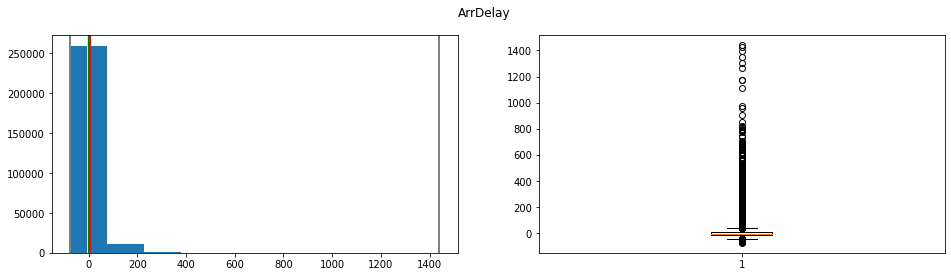

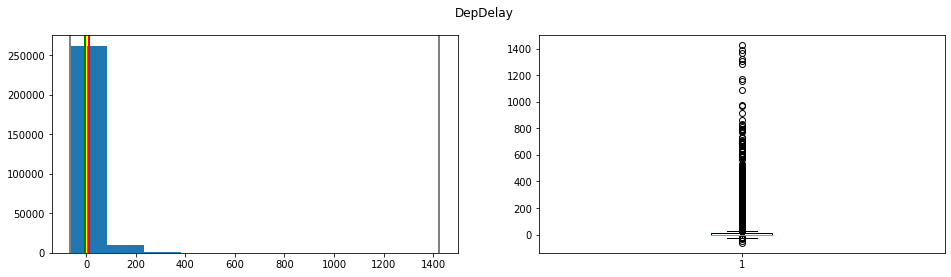

In [ ]:
#identify outliers in the DepDelay and ArrDelay columns

def show_distribution(data):
  #for box plot
  min = data.min()
  max = data.max()
  mean = data.mean()
  median = data.median()
  mode = data.mode()[0]
  print(data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min,
                                                                                            mean, median, mode, max))
  
  fig, ax = plt.subplots(1,2, figsize = (16, 4))
  fig.suptitle(data.name)
  #histogram
  ax[0].hist(data)
  #add line indicators
  ax[0].axvline(x=min, color='gray', linestyle='-', linewidth=2)
  ax[0].axvline(x=max, color='gray', linestyle='-', linewidth=2)
  ax[0].axvline(x=mean, color='red', linestyle='-', linewidth=2)
  ax[0].axvline(x=median, color='yellow', linestyle='-', linewidth=2)
  ax[0].axvline(x=mode, color='green', linestyle='-', linewidth=2)

  #boxplot
  ax[1].boxplot(data)

  fig.show()


show_distribution(df_flights['ArrDelay'])
show_distribution(df_flights['DepDelay'])

In [ ]:
#include only rows where the values for these fields are within the 1st and 90th percentile.
Depdelay_q01 = df_flights['DepDelay'].quantile(0.01)
Depdelay_q90 = df_flights['DepDelay'].quantile(0.90)
df_flights = df_flights[df_flights['DepDelay'] > Depdelay_q01]
df_flights = df_flights[df_flights['DepDelay'] < Depdelay_q90]

ArrDelay_q01 = df_flights['ArrDelay'].quantile(0.01)
ArrDelay_q90 = df_flights['ArrDelay'].quantile(0.90)
df_flights = df_flights[df_flights['ArrDelay'] > ArrDelay_q01]
df_flights = df_flights[df_flights['ArrDelay'] < ArrDelay_q90]

In [ ]:
#View summary statistics for the numeric fields in the dataset.
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214500.0,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000
mean,2013.0,7.027296,15.799389,3.904168,12755.329371,12734.206438,1284.230942,-0.130452,0.057604,1465.878522,-5.680522,0.032597,0.013305
std,0.0,2.006267,8.853235,1.998344,1512.139480,1506.103555,470.230018,7.260672,0.232993,487.646410,10.188473,0.177579,0.114579
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,853.000000,-5.000000,0.000000,1055.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1240.000000,-2.000000,0.000000,1448.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1658.000000,2.000000,0.000000,1850.000000,1.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,16.000000,1.000000,1.000000


ArrDelay 
Minimum:-32.00
Mean:-5.68
Median:-6.00
Mode:0.00
Maximum:16.00

DepDelay 
Minimum:-11.00
Mean:-0.13
Median:-2.00
Mode:-3.00
Maximum:36.00



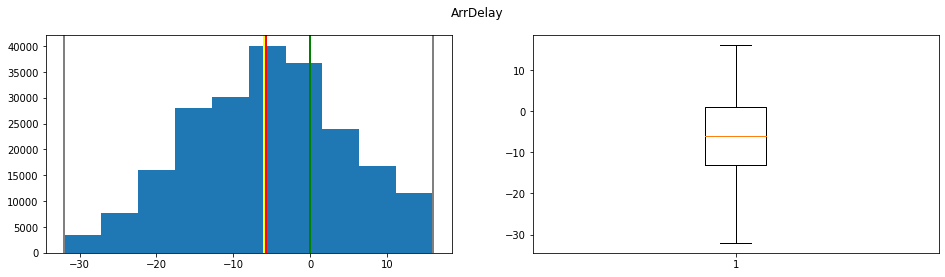

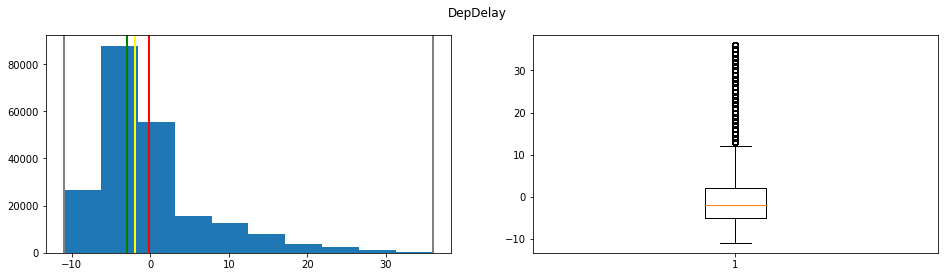

In [ ]:
#Determine the distribution of the DepDelay and ArrDelay columns.
show_distribution(df_flights['ArrDelay'])
show_distribution(df_flights['DepDelay'])

In [ ]:
#What are the average (mean) departure and arrival delays?
print("Average (mean) departure delay: ", df_flights.DepDelay.mean())
print("Average (mean) arrival delay: ", df_flights.ArrDelay.mean())

Average (mean) departure delay:  -0.13045221445221444
Average (mean) arrival delay:  -5.680522144522144


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


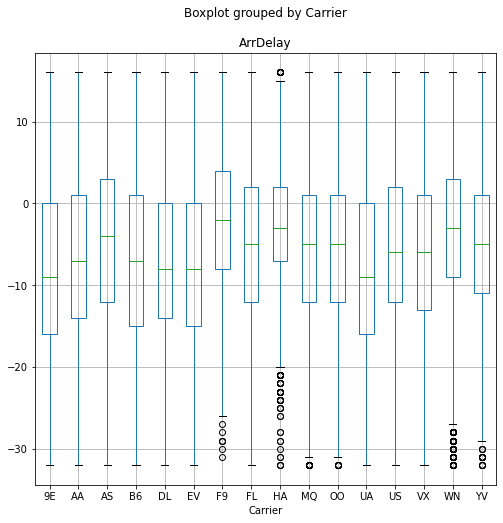

In [ ]:
#How do the carriers compare in terms of arrival delay performance?
df_flights.boxplot(column='ArrDelay', by='Carrier',figsize=(8,8))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


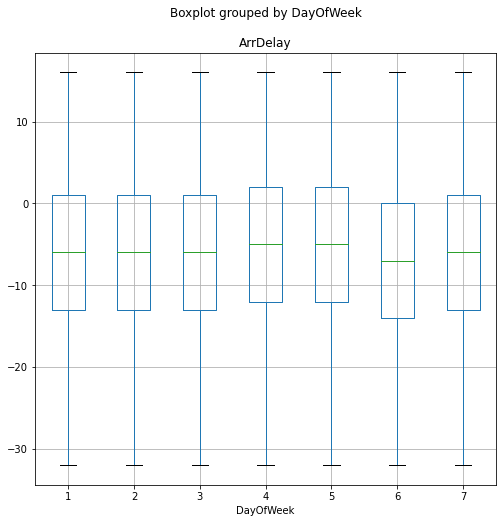

In [ ]:
#Is there a noticable difference in arrival delays for different days of the week?
df_flights.boxplot(column='ArrDelay', by='DayOfWeek',figsize=(8,8))

In [ ]:
#Which departure airport has the highest average departure delay?
grouped = df_flights.groupby(df_flights.OriginAirportName)
pd.DataFrame(grouped['DepDelay'].mean()).sort_values('DepDelay', ascending=False)

,DepDelay
OriginAirportName,
Chicago Midway International,3.865294
Dallas Love Field,3.039141
William P Hobby,2.706247
Denver International,1.863804
Baltimore/Washington International Thurgood Marshall,1.805401
...,...
Tucson International,-2.522114
Richmond International,-2.665944
Ted Stevens Anchorage International,-2.886700


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


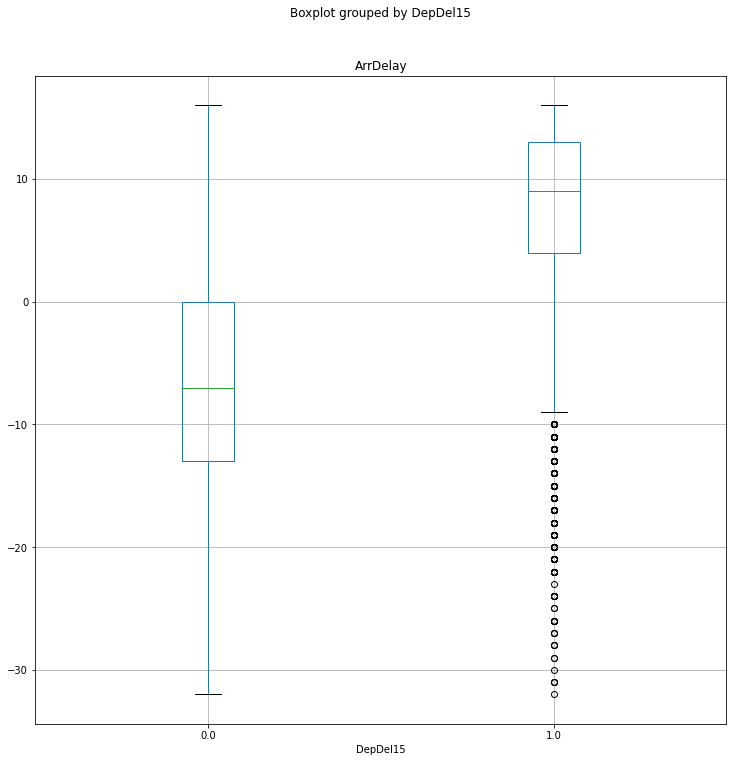

In [ ]:
#Do late departures tend to result in longer arrival delays than on-time departures?
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))

In [ ]:
#Which route (from origin airport to destination airport) has the most late arrivals?
# Add a routes column
routes  = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

# Group by routes
route_group = df_flights.groupby(df_flights.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International > Los Angeles International,67
Los Angeles International > San Francisco International,42
Detroit Metro Wayne County > Chicago O'Hare International,29
LaGuardia > Logan International,29
LaGuardia > Chicago O'Hare International,27
...,...
Norman Y. Mineta San Jose International > Honolulu International,0
Norman Y. Mineta San Jose International > Hartsfield-Jackson Atlanta International,0
Norman Y. Mineta San Jose International > George Bush Intercontinental/Houston,0
